In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

import ast
from ast import literal_eval

import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
warnings.filterwarnings('ignore') 

import wordcloud
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud,STOPWORDS  

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import pickle
import os


In [2]:
creditsdf = pd.read_csv('C:\\Users\\Srijan\\Desktop\\Internship\\Movie Recommender Systems\\DataSet\\credits.csv')
keywordsdf = pd.read_csv('C:\\Users\\Srijan\\Desktop\\Internship\\Movie Recommender Systems\\DataSet\\keywords.csv')
linksdf = pd.read_csv('C:\\Users\\Srijan\\Desktop\\Internship\\Movie Recommender Systems\\DataSet\\links.csv')
links_smalldf = pd.read_csv('C:\\Users\\Srijan\\Desktop\\Internship\\Movie Recommender Systems\\DataSet\\links_small.csv')
movies_metadatadf = pd.read_csv('C:\\Users\\Srijan\\Desktop\\Internship\\Movie Recommender Systems\\DataSet\\movies_metadata.csv', low_memory=False )
ratingsdf = pd.read_csv('C:\\Users\\Srijan\\Desktop\\Internship\\Movie Recommender Systems\\DataSet\\ratings.csv')
ratings_smalldf = pd.read_csv('C:\\Users\\Srijan\\Desktop\\Internship\\Movie Recommender Systems\\DataSet\\ratings_small.csv')

In [3]:
movies_metadatadf.head(2)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0


In [4]:
keywordsdf.head(2)

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."


In [5]:
creditsdf.head(5)

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [6]:
creditsdf.isnull().sum()

cast    0
crew    0
id      0
dtype: int64

In [7]:
keywordsdf.isnull().sum()

id          0
keywords    0
dtype: int64

In [8]:
movies_metadatadf.isnull().sum()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

In [9]:
movies_metadatadf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [10]:
movies_metadatadf.head(2)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0


In [11]:
movies_metadatadf['id'] = movies_metadatadf['id'].astype(str)
creditsdf['id'] = creditsdf['id'].astype(str)
movie_creditsdf = pd.merge(movies_metadatadf, creditsdf, left_on='id', right_on='id')

In [12]:
movie_creditsdf.head(2)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,cast,crew
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de..."
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de..."


In [13]:
keywordsdf['id'] = keywordsdf['id'].astype(str)
movie_creditsdf['id'] = movie_creditsdf['id'].astype(str)
movie_credits_keywordsdf = pd.merge(movie_creditsdf, keywordsdf, left_on='id', right_on='id')

In [14]:
df = movie_credits_keywordsdf

In [15]:
df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,spoken_languages,status,tagline,title,video,vote_average,vote_count,cast,crew,keywords
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...","[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...","[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...","[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...","[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [16]:
df.isnull().sum()

adult                        0
belongs_to_collection    42054
budget                       0
genres                       0
homepage                 38619
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   995
popularity                   4
poster_path                399
production_companies         4
production_countries         4
release_date                88
revenue                      4
runtime                    268
spoken_languages             4
status                      86
tagline                  25845
title                        4
video                        4
vote_average                 4
vote_count                   4
cast                         0
crew                         0
keywords                     0
dtype: int64

In [17]:
df.shape

(46628, 27)

In [18]:
df = df[['id','genres','cast','crew','keywords','original_title','title','overview']]

In [19]:
df.head()

,id,genres,cast,crew,keywords,original_title,title,overview
0,862,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...",Toy Story,Toy Story,"Led by Woody, Andy's toys live happily in his ..."
1,8844,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...","[{'id': 10090, 'name': 'board game'}, {'id': 1...",Jumanji,Jumanji,When siblings Judy and Peter discover an encha...
2,15602,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...","[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...","[{'id': 1495, 'name': 'fishing'}, {'id': 12392...",Grumpier Old Men,Grumpier Old Men,A family wedding reignites the ancient feud be...
3,31357,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...","[{'id': 818, 'name': 'based on novel'}, {'id':...",Waiting to Exhale,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom..."
4,11862,"[{'id': 35, 'name': 'Comedy'}]","[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...","[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n...",Father of the Bride Part II,Father of the Bride Part II,Just when George Banks has recovered from his ...


In [20]:
df.shape

(46628, 8)

In [21]:
df.isnull().sum()

id                  0
genres              0
cast                0
crew                0
keywords            0
original_title      0
title               4
overview          995
dtype: int64

In [22]:
df.dropna(inplace=True)

In [23]:
df.shape

(45629, 8)

In [24]:
df.isnull().sum()

id                0
genres            0
cast              0
crew              0
keywords          0
original_title    0
title             0
overview          0
dtype: int64

In [25]:
df.duplicated().sum()
print(f"Number of duplicates: {df.duplicated().sum()}")

Number of duplicates: 1147


In [26]:
df.drop_duplicates(inplace=True)
duplicates_after_dropping = df.duplicated().sum()
print(f"Number of duplicates after dropping: {duplicates_after_dropping}")

Number of duplicates after dropping: 0


In [27]:
print(df.iloc[0]['genres'])

[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]


In [28]:
# genres is a sring. So my work i have to convert this in a list
def extract(genre_str):
    genre_list = ast.literal_eval(genre_str)
    genre_names = [genre['name'] for genre in genre_list]
    return genre_names

In [29]:
df['genres'] = df['genres'].apply(extract)

In [30]:
df['keywords'] = df['keywords'].apply(extract)

In [31]:
df.head()

,id,genres,cast,crew,keywords,original_title,title,overview
0,862,"[Animation, Comedy, Family]","[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[jealousy, toy, boy, friendship, friends, riva...",Toy Story,Toy Story,"Led by Woody, Andy's toys live happily in his ..."
1,8844,"[Adventure, Fantasy, Family]","[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...","[board game, disappearance, based on children'...",Jumanji,Jumanji,When siblings Judy and Peter discover an encha...
2,15602,"[Romance, Comedy]","[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...","[fishing, best friend, duringcreditsstinger, o...",Grumpier Old Men,Grumpier Old Men,A family wedding reignites the ancient feud be...
3,31357,"[Comedy, Drama, Romance]","[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...","[based on novel, interracial relationship, sin...",Waiting to Exhale,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom..."
4,11862,[Comedy],"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...","[baby, midlife crisis, confidence, aging, daug...",Father of the Bride Part II,Father of the Bride Part II,Just when George Banks has recovered from his ...


In [32]:
df.shape

(44482, 8)

In [33]:
# in cast we want to first 3 character. so we make a function

def cast_conver(obj):
    l = []
    c = 0
    for i in ast.literal_eval(obj):
        if c != 3:
            l.append(i['name'])
            c+=1
        else:
            break
    return l


In [34]:
df['cast'] =df['cast'].apply(cast_conver)

In [35]:
df['crew'][0]

'[{\'credit_id\': \'52fe4284c3a36847f8024f49\', \'department\': \'Directing\', \'gender\': 2, \'id\': 7879, \'job\': \'Director\', \'name\': \'John Lasseter\', \'profile_path\': \'/7EdqiNbr4FRjIhKHyPPdFfEEEFG.jpg\'}, {\'credit_id\': \'52fe4284c3a36847f8024f4f\', \'department\': \'Writing\', \'gender\': 2, \'id\': 12891, \'job\': \'Screenplay\', \'name\': \'Joss Whedon\', \'profile_path\': \'/dTiVsuaTVTeGmvkhcyJvKp2A5kr.jpg\'}, {\'credit_id\': \'52fe4284c3a36847f8024f55\', \'department\': \'Writing\', \'gender\': 2, \'id\': 7, \'job\': \'Screenplay\', \'name\': \'Andrew Stanton\', \'profile_path\': \'/pvQWsu0qc8JFQhMVJkTHuexUAa1.jpg\'}, {\'credit_id\': \'52fe4284c3a36847f8024f5b\', \'department\': \'Writing\', \'gender\': 2, \'id\': 12892, \'job\': \'Screenplay\', \'name\': \'Joel Cohen\', \'profile_path\': \'/dAubAiZcvKFbboWlj7oXOkZnTSu.jpg\'}, {\'credit_id\': \'52fe4284c3a36847f8024f61\', \'department\': \'Writing\', \'gender\': 0, \'id\': 12893, \'job\': \'Screenplay\', \'name\': \'A

In [36]:
# in crew i want to job directer. so we make a function

def fetch_directer(obj):
    l = []
    for i in ast.literal_eval(obj):
        if i['job'] == 'Director':
            l.append(i['name'])
            break
    return l



In [37]:
df['crew'] = df['crew'].apply(fetch_directer)

In [38]:
df.head(5)

,id,genres,cast,crew,keywords,original_title,title,overview
0,862,"[Animation, Comedy, Family]","[Tom Hanks, Tim Allen, Don Rickles]",[John Lasseter],"[jealousy, toy, boy, friendship, friends, riva...",Toy Story,Toy Story,"Led by Woody, Andy's toys live happily in his ..."
1,8844,"[Adventure, Fantasy, Family]","[Robin Williams, Jonathan Hyde, Kirsten Dunst]",[Joe Johnston],"[board game, disappearance, based on children'...",Jumanji,Jumanji,When siblings Judy and Peter discover an encha...
2,15602,"[Romance, Comedy]","[Walter Matthau, Jack Lemmon, Ann-Margret]",[Howard Deutch],"[fishing, best friend, duringcreditsstinger, o...",Grumpier Old Men,Grumpier Old Men,A family wedding reignites the ancient feud be...
3,31357,"[Comedy, Drama, Romance]","[Whitney Houston, Angela Bassett, Loretta Devine]",[Forest Whitaker],"[based on novel, interracial relationship, sin...",Waiting to Exhale,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom..."
4,11862,[Comedy],"[Steve Martin, Diane Keaton, Martin Short]",[Charles Shyer],"[baby, midlife crisis, confidence, aging, daug...",Father of the Bride Part II,Father of the Bride Part II,Just when George Banks has recovered from his ...


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44482 entries, 0 to 46627
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              44482 non-null  object
 1   genres          44482 non-null  object
 2   cast            44482 non-null  object
 3   crew            44482 non-null  object
 4   keywords        44482 non-null  object
 5   original_title  44482 non-null  object
 6   title           44482 non-null  object
 7   overview        44482 non-null  object
dtypes: object(8)
memory usage: 4.1+ MB


In [40]:
def changingLabels(number):

    return str(number/10**6) + "M"

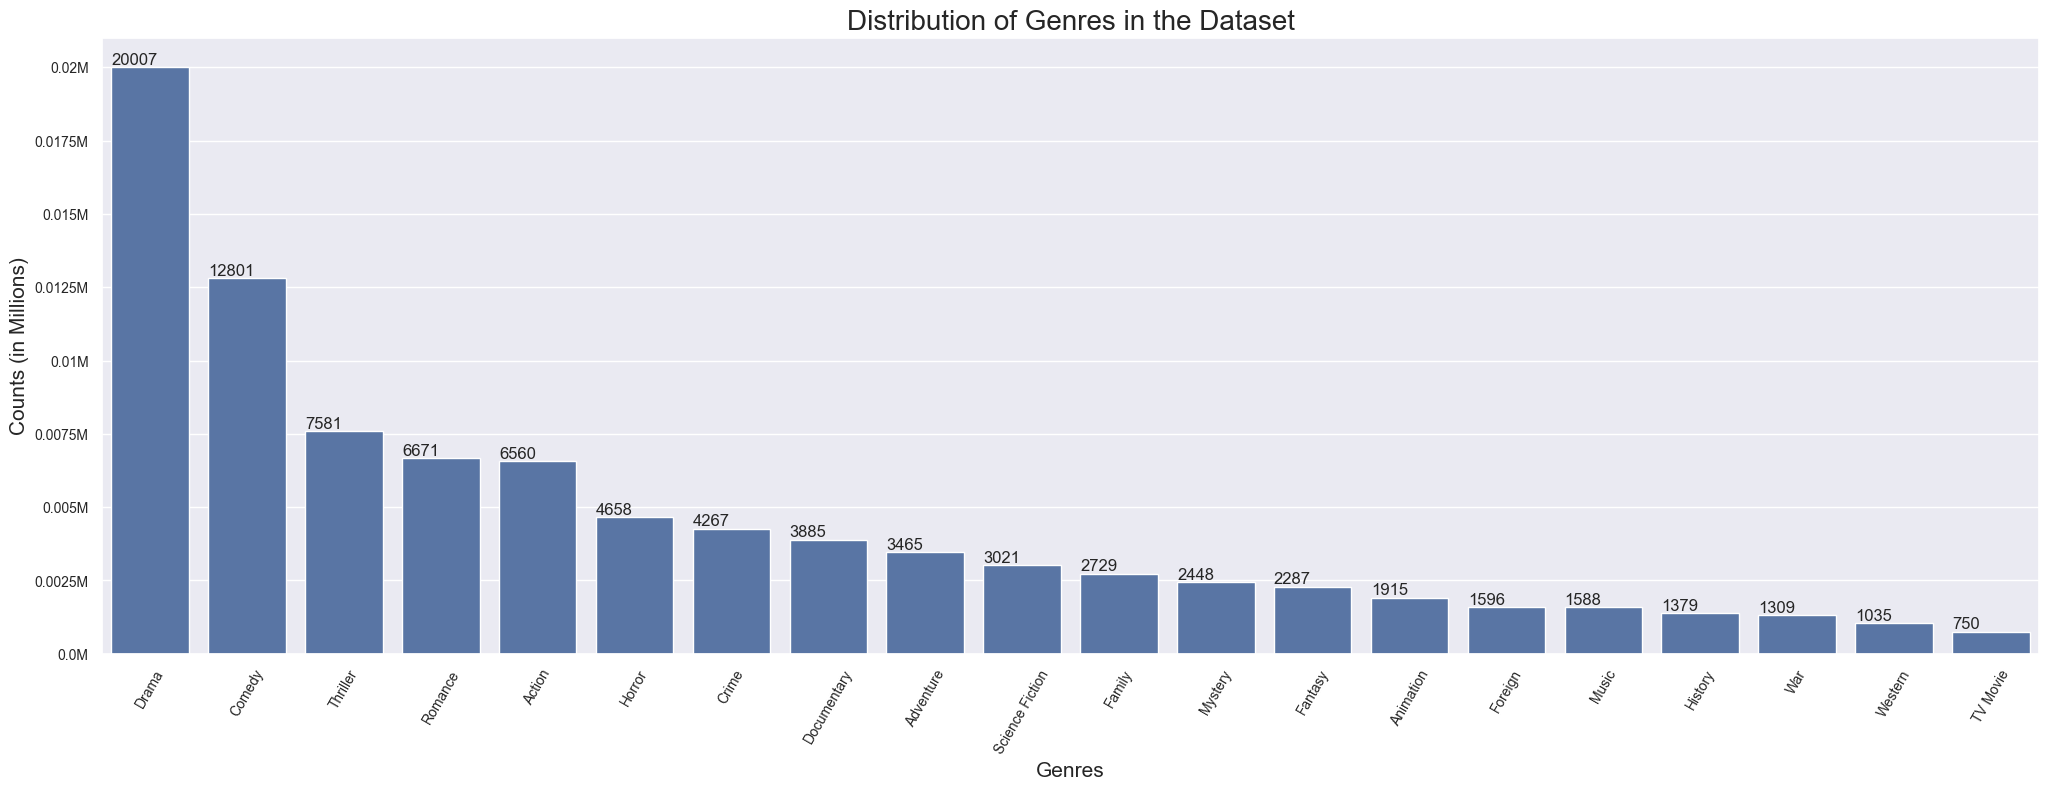

In [41]:
df_exploded = df.explode('genres')

genres_df = pd.DataFrame(df_exploded['genres'].value_counts()).reset_index()
genres_df.columns = ["Genre", "Count"]

sns.set(style="darkgrid")
fig, axes = plt.subplots(1, 1, figsize=(25, 8), sharey=True)

sns.barplot(y="Count", x="Genre", data=genres_df, ax=axes)
axes.set_yticklabels([changingLabels(num) for num in axes.get_yticks()])
for p in axes.patches:
    axes.annotate('{}'.format(int(p.get_height())), (p.get_x(), p.get_height()+100))

plt.tick_params(labelsize = 15)
plt.title("Distribution of Genres in the Dataset", fontsize = 20)
plt.xlabel("Genres", fontsize = 15)
plt.xticks(rotation=60, fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel("Counts (in Millions)", fontsize = 15)
plt.show()

In [42]:
df['genres']=df['genres'].apply(lambda x:[i.replace(" ", "" ) for i in x] )
df['cast']=df['cast'].apply(lambda x:[i.replace(" ", "" ) for i in x] )
df['crew']=df['crew'].apply(lambda x:[i.replace(" ", "" ) for i in x] )
df['keywords']=df['keywords'].apply(lambda x:[i.replace(" ", "" ) for i in x] )

In [43]:
df.head()

,id,genres,cast,crew,keywords,original_title,title,overview
0,862,"[Animation, Comedy, Family]","[TomHanks, TimAllen, DonRickles]",[JohnLasseter],"[jealousy, toy, boy, friendship, friends, riva...",Toy Story,Toy Story,"Led by Woody, Andy's toys live happily in his ..."
1,8844,"[Adventure, Fantasy, Family]","[RobinWilliams, JonathanHyde, KirstenDunst]",[JoeJohnston],"[boardgame, disappearance, basedonchildren'sbo...",Jumanji,Jumanji,When siblings Judy and Peter discover an encha...
2,15602,"[Romance, Comedy]","[WalterMatthau, JackLemmon, Ann-Margret]",[HowardDeutch],"[fishing, bestfriend, duringcreditsstinger, ol...",Grumpier Old Men,Grumpier Old Men,A family wedding reignites the ancient feud be...
3,31357,"[Comedy, Drama, Romance]","[WhitneyHouston, AngelaBassett, LorettaDevine]",[ForestWhitaker],"[basedonnovel, interracialrelationship, single...",Waiting to Exhale,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom..."
4,11862,[Comedy],"[SteveMartin, DianeKeaton, MartinShort]",[CharlesShyer],"[baby, midlifecrisis, confidence, aging, daugh...",Father of the Bride Part II,Father of the Bride Part II,Just when George Banks has recovered from his ...


In [44]:
df['overview'][0]

"Led by Woody, Andy's toys live happily in his room until Andy's birthday brings Buzz Lightyear onto the scene. Afraid of losing his place in Andy's heart, Woody plots against Buzz. But when circumstances separate Buzz and Woody from their owner, the duo eventually learns to put aside their differences."

In [45]:
df['overview'] = df['overview'].apply(lambda x:x.split())

In [46]:
df['overview'][0]

['Led',
 'by',
 'Woody,',
 "Andy's",
 'toys',
 'live',
 'happily',
 'in',
 'his',
 'room',
 'until',
 "Andy's",
 'birthday',
 'brings',
 'Buzz',
 'Lightyear',
 'onto',
 'the',
 'scene.',
 'Afraid',
 'of',
 'losing',
 'his',
 'place',
 'in',
 "Andy's",
 'heart,',
 'Woody',
 'plots',
 'against',
 'Buzz.',
 'But',
 'when',
 'circumstances',
 'separate',
 'Buzz',
 'and',
 'Woody',
 'from',
 'their',
 'owner,',
 'the',
 'duo',
 'eventually',
 'learns',
 'to',
 'put',
 'aside',
 'their',
 'differences.']

In [47]:
df['tag'] = df['overview'] + df['genres'] + df['keywords'] + df['cast'] + df['crew']

In [48]:
df.head()

,id,genres,cast,crew,keywords,original_title,title,overview,tag
0,862,"[Animation, Comedy, Family]","[TomHanks, TimAllen, DonRickles]",[JohnLasseter],"[jealousy, toy, boy, friendship, friends, riva...",Toy Story,Toy Story,"[Led, by, Woody,, Andy's, toys, live, happily,...","[Led, by, Woody,, Andy's, toys, live, happily,..."
1,8844,"[Adventure, Fantasy, Family]","[RobinWilliams, JonathanHyde, KirstenDunst]",[JoeJohnston],"[boardgame, disappearance, basedonchildren'sbo...",Jumanji,Jumanji,"[When, siblings, Judy, and, Peter, discover, a...","[When, siblings, Judy, and, Peter, discover, a..."
2,15602,"[Romance, Comedy]","[WalterMatthau, JackLemmon, Ann-Margret]",[HowardDeutch],"[fishing, bestfriend, duringcreditsstinger, ol...",Grumpier Old Men,Grumpier Old Men,"[A, family, wedding, reignites, the, ancient, ...","[A, family, wedding, reignites, the, ancient, ..."
3,31357,"[Comedy, Drama, Romance]","[WhitneyHouston, AngelaBassett, LorettaDevine]",[ForestWhitaker],"[basedonnovel, interracialrelationship, single...",Waiting to Exhale,Waiting to Exhale,"[Cheated, on,, mistreated, and, stepped, on,, ...","[Cheated, on,, mistreated, and, stepped, on,, ..."
4,11862,[Comedy],"[SteveMartin, DianeKeaton, MartinShort]",[CharlesShyer],"[baby, midlifecrisis, confidence, aging, daugh...",Father of the Bride Part II,Father of the Bride Part II,"[Just, when, George, Banks, has, recovered, fr...","[Just, when, George, Banks, has, recovered, fr..."


In [49]:
df['tag'][0]

['Led',
 'by',
 'Woody,',
 "Andy's",
 'toys',
 'live',
 'happily',
 'in',
 'his',
 'room',
 'until',
 "Andy's",
 'birthday',
 'brings',
 'Buzz',
 'Lightyear',
 'onto',
 'the',
 'scene.',
 'Afraid',
 'of',
 'losing',
 'his',
 'place',
 'in',
 "Andy's",
 'heart,',
 'Woody',
 'plots',
 'against',
 'Buzz.',
 'But',
 'when',
 'circumstances',
 'separate',
 'Buzz',
 'and',
 'Woody',
 'from',
 'their',
 'owner,',
 'the',
 'duo',
 'eventually',
 'learns',
 'to',
 'put',
 'aside',
 'their',
 'differences.',
 'Animation',
 'Comedy',
 'Family',
 'jealousy',
 'toy',
 'boy',
 'friendship',
 'friends',
 'rivalry',
 'boynextdoor',
 'newtoy',
 'toycomestolife',
 'TomHanks',
 'TimAllen',
 'DonRickles',
 'JohnLasseter']

In [50]:
df['tag'] = df['tag'].apply(lambda x:" ".join(x))

In [51]:
df.head()

,id,genres,cast,crew,keywords,original_title,title,overview,tag
0,862,"[Animation, Comedy, Family]","[TomHanks, TimAllen, DonRickles]",[JohnLasseter],"[jealousy, toy, boy, friendship, friends, riva...",Toy Story,Toy Story,"[Led, by, Woody,, Andy's, toys, live, happily,...","Led by Woody, Andy's toys live happily in his ..."
1,8844,"[Adventure, Fantasy, Family]","[RobinWilliams, JonathanHyde, KirstenDunst]",[JoeJohnston],"[boardgame, disappearance, basedonchildren'sbo...",Jumanji,Jumanji,"[When, siblings, Judy, and, Peter, discover, a...",When siblings Judy and Peter discover an encha...
2,15602,"[Romance, Comedy]","[WalterMatthau, JackLemmon, Ann-Margret]",[HowardDeutch],"[fishing, bestfriend, duringcreditsstinger, ol...",Grumpier Old Men,Grumpier Old Men,"[A, family, wedding, reignites, the, ancient, ...",A family wedding reignites the ancient feud be...
3,31357,"[Comedy, Drama, Romance]","[WhitneyHouston, AngelaBassett, LorettaDevine]",[ForestWhitaker],"[basedonnovel, interracialrelationship, single...",Waiting to Exhale,Waiting to Exhale,"[Cheated, on,, mistreated, and, stepped, on,, ...","Cheated on, mistreated and stepped on, the wom..."
4,11862,[Comedy],"[SteveMartin, DianeKeaton, MartinShort]",[CharlesShyer],"[baby, midlifecrisis, confidence, aging, daugh...",Father of the Bride Part II,Father of the Bride Part II,"[Just, when, George, Banks, has, recovered, fr...",Just when George Banks has recovered from his ...


In [52]:
new_df = df[['id','title','tag']]

In [53]:
new_df.head()

,id,title,tag
0,862,Toy Story,"Led by Woody, Andy's toys live happily in his ..."
1,8844,Jumanji,When siblings Judy and Peter discover an encha...
2,15602,Grumpier Old Men,A family wedding reignites the ancient feud be...
3,31357,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom..."
4,11862,Father of the Bride Part II,Just when George Banks has recovered from his ...


In [54]:
new_df['tag'][0]

"Led by Woody, Andy's toys live happily in his room until Andy's birthday brings Buzz Lightyear onto the scene. Afraid of losing his place in Andy's heart, Woody plots against Buzz. But when circumstances separate Buzz and Woody from their owner, the duo eventually learns to put aside their differences. Animation Comedy Family jealousy toy boy friendship friends rivalry boynextdoor newtoy toycomestolife TomHanks TimAllen DonRickles JohnLasseter"

In [55]:
new_df['tag'] = new_df['tag'].apply(lambda x:x.lower())

In [56]:
new_df['tag'][0]

"led by woody, andy's toys live happily in his room until andy's birthday brings buzz lightyear onto the scene. afraid of losing his place in andy's heart, woody plots against buzz. but when circumstances separate buzz and woody from their owner, the duo eventually learns to put aside their differences. animation comedy family jealousy toy boy friendship friends rivalry boynextdoor newtoy toycomestolife tomhanks timallen donrickles johnlasseter"

In [57]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Srijan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Srijan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Srijan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [58]:
stop_words = set(stopwords.words('english'))

In [59]:
def remove_stopwords(text):
    """Remove common English words using NLTK's list of stopwords"""
    words = word_tokenize(text)
    filtered = [w for w in words if not w in stop_words]
    return ' '.join(filtered)

In [60]:
new_df['tag'].apply(lambda x: remove_stopwords(x)) 

0        led woody , andy 's toys live happily room and...
1        siblings judy peter discover enchanted board g...
2        family wedding reignites ancient feud next-doo...
3        cheated , mistreated stepped , women holding b...
4        george banks recovered daughter 's wedding , r...
                               ...                        
46623    rising falling man woman . drama family tragic...
46624    artist struggles finish work storyline cult pl...
46625    one hits goes wrong , professional assassin en...
46626    small town live two brothers , one minister on...
46627    50 years decriminalisation homosexuality uk , ...
Name: tag, Length: 44482, dtype: object

In [61]:
unique_categories = new_df['tag'].nunique()
print("Number of unique categories:", unique_categories)

Number of unique categories: 44474


In [62]:
def generate_wordcloud_from_dataframe(df, column_name):
    # Concatenate all text in the specified column into a single string
    text = ' '.join(df[column_name].fillna(''))
    # Generate word cloud
    stopwords = set(STOPWORDS)
    diag = wordcloud.WordCloud(stopwords=stopwords, background_color='black', colormap='coolwarm', width=800, height=600).generate(text)
    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 6))
    plt.imshow(diag, interpolation='bilinear')
    plt.axis('off')   
    plt.show()


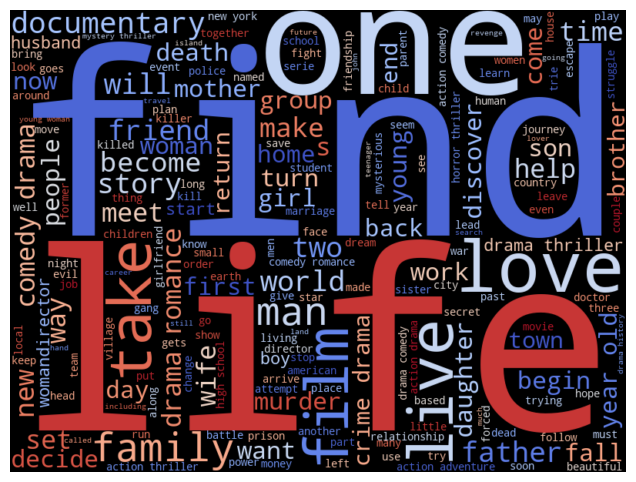

In [63]:
generate_wordcloud_from_dataframe(new_df,'tag')

In [64]:
cv = CountVectorizer(max_features=5000,stop_words='english')

In [65]:
cv.fit_transform(new_df['tag']).toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [66]:
cv.fit_transform(new_df['tag']).toarray().shape

(44482, 5000)

In [67]:
vector = cv.fit_transform(new_df['tag']).toarray()

In [68]:
vector

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [69]:
vector.shape

(44482, 5000)

In [70]:
cv.get_stop_words()

frozenset({'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides'

In [71]:
cv.get_feature_names_out()

array(['000', '10', '100', ..., 'zombies', 'zone', 'zoo'], dtype=object)

In [72]:
ps = PorterStemmer()


In [73]:
def stem(text):
    y = [] 
    for i in text.split():
        y.append(ps.stem(i))
    return" ".join(y)   

In [74]:
new_df['tag'][0]

"led by woody, andy's toys live happily in his room until andy's birthday brings buzz lightyear onto the scene. afraid of losing his place in andy's heart, woody plots against buzz. but when circumstances separate buzz and woody from their owner, the duo eventually learns to put aside their differences. animation comedy family jealousy toy boy friendship friends rivalry boynextdoor newtoy toycomestolife tomhanks timallen donrickles johnlasseter"

In [75]:
result = stem("led by woody, andy's toys live happily in his room until andy's birthday brings buzz lightyear onto the scene. afraid of losing his place in andy's heart, woody plots against buzz. but when circumstances separate buzz and woody from their owner, the duo eventually learns to put aside their differences. animation comedy family jealousy toy boy friendship friends rivalry boynextdoor newtoy toycomestolife tomhanks timallen donrickles johnlasseter")

In [76]:
result

"led by woody, andy' toy live happili in hi room until andy' birthday bring buzz lightyear onto the scene. afraid of lose hi place in andy' heart, woodi plot against buzz. but when circumst separ buzz and woodi from their owner, the duo eventu learn to put asid their differences. anim comedi famili jealousi toy boy friendship friend rivalri boynextdoor newtoy toycomestolif tomhank timallen donrickl johnlasset"

In [77]:
new_df['tag']=new_df['tag'].apply(stem)

In [78]:
cv = CountVectorizer(max_features=5000,stop_words='english')

In [79]:
cv.fit_transform(new_df['tag']).toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [80]:
vector = cv.fit_transform(new_df['tag']).toarray()

In [81]:
similarity = cosine_similarity(vector)

In [82]:
similarity

array([[1.        , 0.07216878, 0.05025189, ..., 0.        , 0.17099639,
        0.        ],
       [0.07216878, 1.        , 0.06527912, ..., 0.        , 0.05923489,
        0.03608439],
       [0.05025189, 0.06527912, 1.        , ..., 0.        , 0.01546721,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.17099639, 0.05923489, 0.01546721, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.03608439, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [83]:
cosine_similarity(vector).shape

(44482, 44482)

In [84]:
# lambda x:x[1] second number basis short
# enumerate use to hold the list position
# list is use to enumerate to see

sorted(list(enumerate(similarity[0])), reverse=True, key= lambda x:x[1])[1:11]

[(2979, 0.4341215710622296),
 (44453, 0.3779644730092272),
 (25548, 0.3726779962499649),
 (7184, 0.3698001308168194),
 (24304, 0.3698001308168194),
 (42246, 0.3578300267477955),
 (33701, 0.34020690871988585),
 (2603, 0.3370999312316211),
 (9179, 0.33471934069760145),
 (1906, 0.3333333333333333)]

In [85]:
def recommended(movie):
    movie_index = new_df[new_df['title'] == movie].index[0]
    distance  = similarity[movie_index]
    movie_list = sorted(list(enumerate(distance)), reverse=True, key= lambda x:x[1])[1:11]
    for i in movie_list:
        new_df.iloc[i[0]].id
        print(new_df.iloc[i[0]].title)

In [86]:
new_df.tail()

,id,title,tag
46623,439050,Subdue,rise and fall between a man and woman. drama f...
46624,111109,Century of Birthing,an artist struggl to finish hi work while a st...
46625,67758,Betrayal,"when one of her hit goe wrong, a profession as..."
46626,227506,Satan Triumphant,"in a small town live two brothers, one a minis..."
46627,461257,Queerama,50 year after decriminalis of homosexu in the ...


In [87]:
new_df[new_df['title'] == 'Century of Birthing'].index[0]

46624

In [88]:
df[df['title'] == 'Jumanji']

,id,genres,cast,crew,keywords,original_title,title,overview,tag
1,8844,"[Adventure, Fantasy, Family]","[RobinWilliams, JonathanHyde, KirstenDunst]",[JoeJohnston],"[boardgame, disappearance, basedonchildren'sbo...",Jumanji,Jumanji,"[When, siblings, Judy, and, Peter, discover, a...",When siblings Judy and Peter discover an encha...


In [89]:
recommended('Jumanji')

Table No. 21
Enter the Battlefield: Life on the Magic - The Gathering Pro Tour
Liar Game: Reborn
The Games Maker
100 Yen: The Japanese Arcade Experience
Beta Test
Indie Game: The Movie
The Last Starfighter
Wreck-It Ralph
Brainscan


In [90]:
new_df.iloc[21465]

id                                                  157129
title                                         Table No. 21
tag      a coupl live a mediocr life and are thrill to ...
Name: 21766, dtype: object

In [91]:
pickle.dump(new_df.to_dict(), open('movies_name.pkl', 'wb'))

In [94]:
pickle.dump(similarity, open('recommended.pkl', 'wb'))

In [96]:
with open('C:\\Users\\Srijan\Desktop\\Internship\Movie Recommender Systems\\recommended.pkl', 'rb') as file:
    data = pickle.load(file)

In [97]:
data.size

1978648324

In [98]:
import joblib

In [99]:
joblib.dump(similarity , 'model_save')

['model_save']

In [100]:
job = joblib.load('C:\\Users\\Srijan\\Desktop\\Internship\\Movie Recommender Systems\\model_save')

In [101]:
def recommended1(movie):
    movie_index = new_df[new_df['title'] == movie].index[0]
    distance  = job[movie_index]
    movie_list = sorted(list(enumerate(distance)), reverse=True, key= lambda x:x[1])[1:11]
    for i in movie_list:
        new_df.iloc[i[0]].id
        print(new_df.iloc[i[0]].title)

In [102]:
recommended1('Jumanji')

Table No. 21
Enter the Battlefield: Life on the Magic - The Gathering Pro Tour
Liar Game: Reborn
The Games Maker
100 Yen: The Japanese Arcade Experience
Beta Test
Indie Game: The Movie
The Last Starfighter
Wreck-It Ralph
Brainscan
